<a href="https://colab.research.google.com/github/Oukey/M_L/blob/master/myHW_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем нужные модули:

In [0]:
import torch
# import torch.nn as nn
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
# import numpy as np
# from torch.nn import Linear, Sigmoid
from torch import optim, nn

Задание гипер-параметров:

In [0]:
input_size = 28*28      # Размер изображения в точках
hidden_size = 700       # Количество нейронов в скрытом слое
num_classes = 10        # Количество распознающихся классов (10 цифр)
n_epochs = 5            # Количество эпох
batch_size = 10         # Размер мини-пакета входных данных
lr = 0.001              # Скорость обучения

Загрузка и проверка размеров датасетов

In [211]:
mnist_trainset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
'''
root - каталог размещения датасета
download - необходимость скачивания датасета
train - обучающий(True) или тестовый(False)
transform - трансформация, предваритеьная обработка
'''
print(len(mnist_trainset))  # вывод размера обучающего датасета
print(len(mnist_testset))  # вывод размера тестового датасета

60000
10000


Обработка датасета мини-пакетами

In [0]:
# Загрузчик обучающих данных
train_loader = torch.utils.data.DataLoader(dataset=mnist_trainset, batch_size=batch_size, shuffle=True)
# Загрузчик тестовых данных
test_loader = torch.utils.data.DataLoader(dataset=mnist_testset, batch_size=batch_size, shuffle=True)

Функция стандартного шага обучения

In [0]:
# Инициализация девайса
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def make_train_step(model, loss_fn, otpimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step

Задание модели, вида оптимизации. Обучение и расчет лосса

In [214]:
model = torch.nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(700, 700),
    nn.ReLU(),
    nn.Linear(hidden_size, num_classes))
model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)

train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
    for images, labels in train_loader:
        # преобразование в одномерный вектор
        images = images.reshape(-1, 28*28).to(device)  
        images = images.to(device)
        labels = labels.to(device)
        loss = train_step(images, labels)
    print(epoch)

print('model', model.state_dict())
print('loss', loss)        

0
1
2
3
4
model OrderedDict([('0.weight', tensor([[-0.0123, -0.0256,  0.0174,  ...,  0.0280, -0.0255, -0.0296],
        [ 0.0125,  0.0065,  0.0100,  ...,  0.0343, -0.0233, -0.0121],
        [ 0.0219,  0.0081, -0.0201,  ...,  0.0031,  0.0275,  0.0154],
        ...,
        [-0.0296, -0.0275, -0.0047,  ...,  0.0159,  0.0137,  0.0164],
        [ 0.0099,  0.0271,  0.0308,  ...,  0.0292,  0.0181,  0.0204],
        [ 0.0168, -0.0031, -0.0036,  ...,  0.0052, -0.0160,  0.0011]])), ('0.bias', tensor([ 2.7806e-03,  3.2412e-02,  1.7372e-02, -3.5917e-02,  2.4504e-02,
         3.2653e-03,  4.4906e-02, -2.7591e-02,  1.1626e-02, -1.1298e-02,
        -1.5462e-02, -5.7980e-03, -8.0783e-03,  2.2288e-02, -1.3054e-02,
         1.0545e-02, -5.0332e-02, -1.0981e-03,  5.1418e-03, -4.2777e-02,
         4.8796e-03, -1.7873e-02, -4.0158e-02,  3.5151e-03, -2.1170e-02,
         1.6871e-02, -5.2871e-03, -2.4208e-02, -1.5646e-02,  7.9622e-03,
         7.5051e-03, -3.7682e-02, -9.0879e-03,  4.7180e-02,  1.3719e-02,


Проверка точности обработки 10.000 тестовых изображений

In [215]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Точность: {}%'.format(100 * correct / total))

Точность: 98.09%


Сохранение обученной модели

In [0]:
torch.save(model, 'mnist_full.pt')

Загрузка модели

In [217]:
model = torch.load('mnist_full.pt')
model.eval()

Sequential(
  (0): Linear(in_features=784, out_features=700, bias=True)
  (1): ReLU()
  (2): Linear(in_features=700, out_features=700, bias=True)
  (3): ReLU()
  (4): Linear(in_features=700, out_features=10, bias=True)
)

Визуальная проверка обученной модели. Код выводит четыре случайных изображения из датасета и указывает под ними соответствующие им классы (прогноз), которые заданы в списке classes:

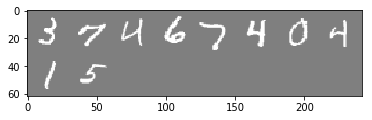

         3          7          4          6          7          4          0          4          1          5


In [218]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%10s' % classes[labels[j]] for j in range(10)))